In [2]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cleaner(file, column_name, condition): 
    #file = pd.DataFrame(file.data)
    file = file[np.logical_not(np.isnan(file))]
    file = file[np.logical_not(np.isinf(file))]
    file = file[condition(file[column_name])]
    file.head()
    return(file)

def main_cleaner(file, condition): 
    for i in file.columns:
        file = file[np.logical_not(np.isnan(file))]
        file = file[np.logical_not(np.isinf(file))]
        file = cleaner(file, i, condition)
        file = file[np.logical_not(np.isnan(file))]
    return(file)

def gtr0(x):
    return x > 0.0

"""
    removes rows with bad values
    
    parameters
    ----------
    a_dataframe: pandas dataframe
        the not-cleaned dataframe
    column_name: string
        the name of the column on which to filter by conditions
    conditions: list of functions (maybe?)
        conditions to check
    
    returns
    -------
    a_dataframe: pandas dataframe
        the cleaned dataframe
    
    notes
    -----
    
    """

In [4]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [5]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [6]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [7]:
print(useful_columns_zcosmos_data)

['z', 'Imag']


In [8]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [9]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [10]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [11]:
useful_columns_cosmos_range = list(range(4, 14)) + [15]
useful_columns_cosmos_data = [cosmos_names[i] for i in useful_columns_cosmos_range]
print(useful_columns_cosmos_data)

['imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'zphot']


In [12]:
zphot = useful_columns_cosmos_data[10]
cosmos_redshift = cosmos[zphot]
print(cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.07  0.67  1.26]


In [13]:
print(len(zcosmos))
print(len(cosmos))

10644
438226


In [14]:
zcosmos_df = pd.DataFrame(fits_data[1].data)
zcosmos_df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


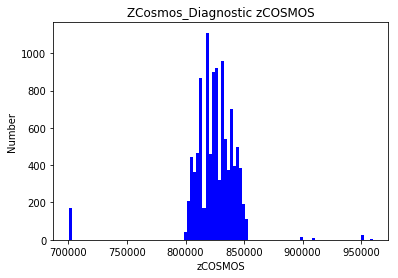

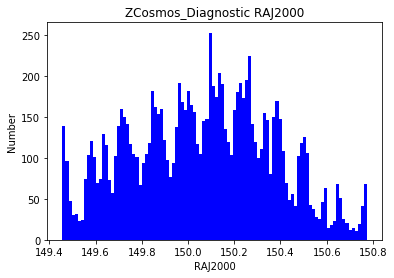

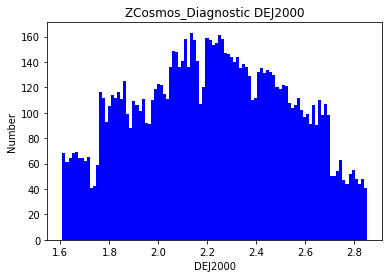

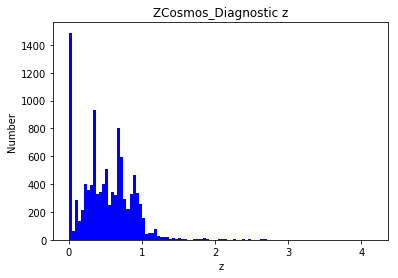

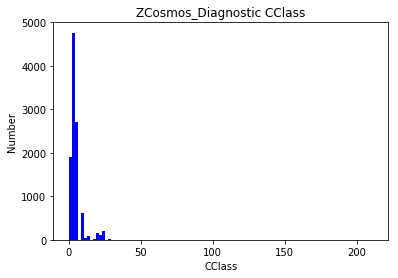

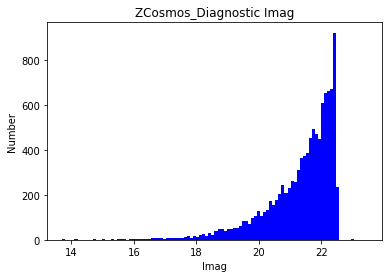

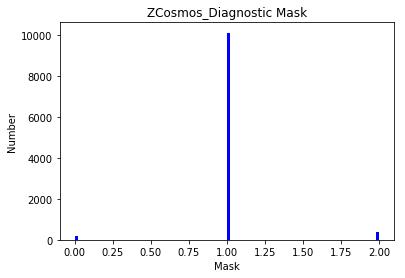

In [15]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos_df:
    plt.hist(zcosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    ##plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [16]:
##remove abnormal placeholder values
zcosmos_df_part2 = zcosmos_df.query('z<999')
zcosmos_df_filtered = zcosmos_df_part2.query('z>0.000')
zcosmos_df_filtered.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [17]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


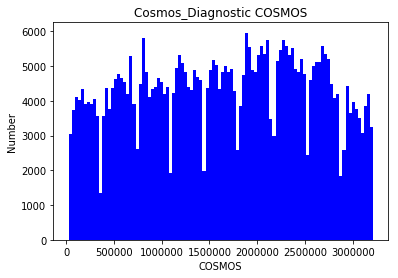

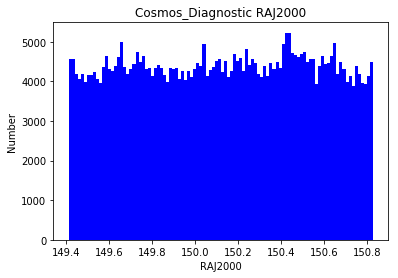

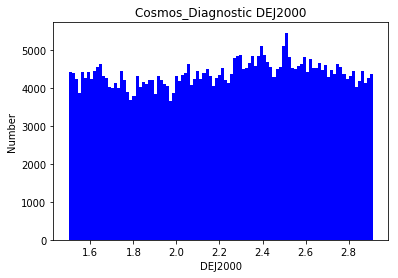

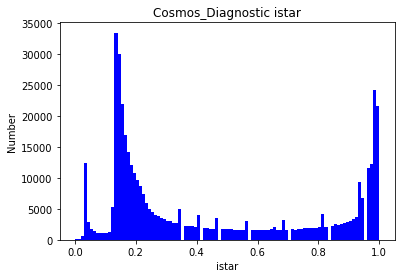

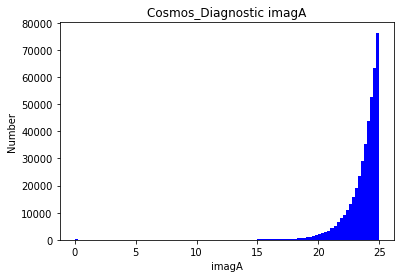

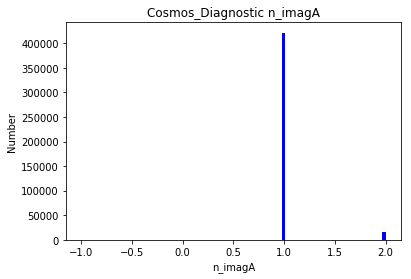

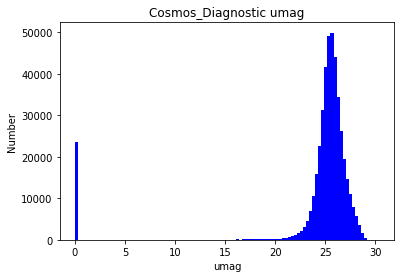

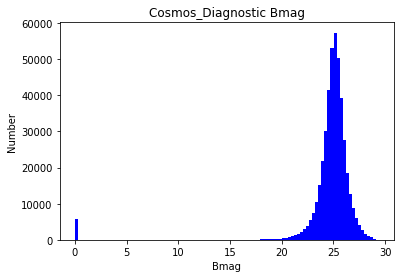

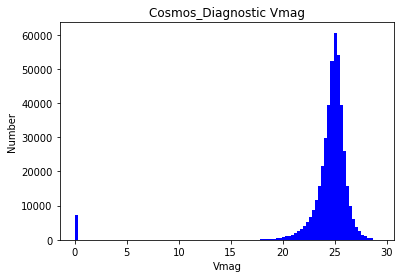

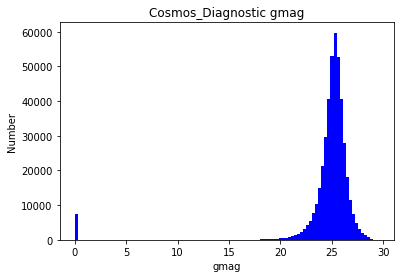

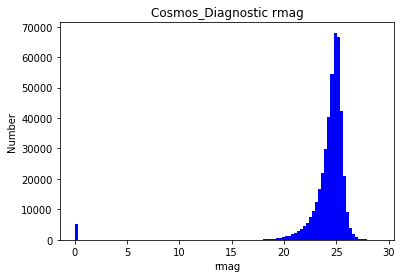

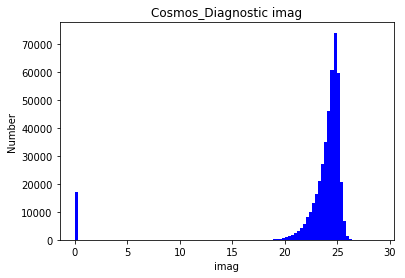

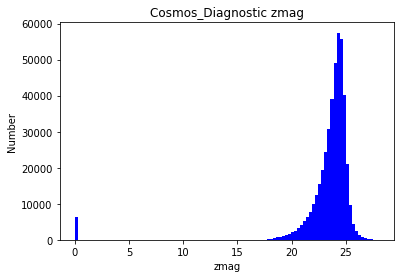

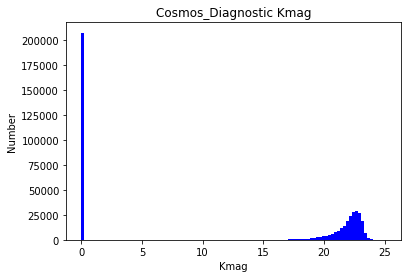

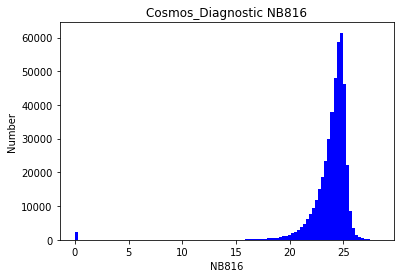

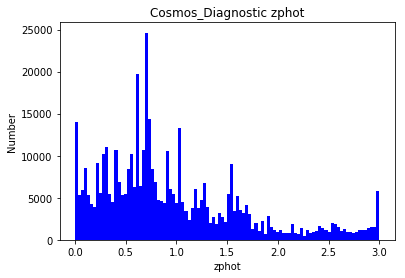

In [18]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [19]:
#removal of abnormal placeholder values
cosmos_df_filtered = main_cleaner(cosmos_df, gtr0)

In [20]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1= pd.read_csv('cross_match.csv')

In [21]:
print(cosmos_and_zcosmos_cross_match1.columns)

Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')


In [22]:
cosmos_and_zcosmos_cross_match_useful_columns = ['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000', 
                                                  'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
                                                  'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask']

In [23]:
print(cosmos_and_zcosmos_cross_match_useful_columns[14])

_RAJ2000.1


In [24]:
prob_col = cosmos_and_zcosmos_cross_match1.columns.tolist()[6]
np.all(np.isfinite(cosmos_and_zcosmos_cross_match1[prob_col]))

False

In [25]:
np.any(np.isinf(cosmos_and_zcosmos_cross_match1['Bmag']))


False

In [26]:
cosmos_and_zcosmos_cross_match = main_cleaner(cosmos_and_zcosmos_cross_match1, gtr0)

angDist


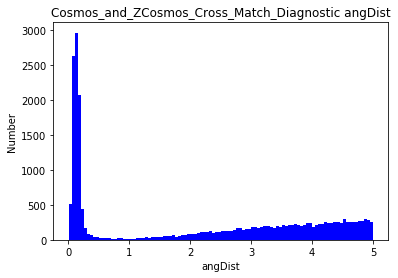

_RAJ2000


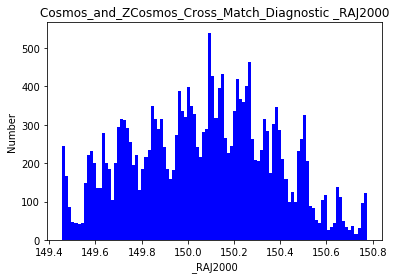

_DEJ2000


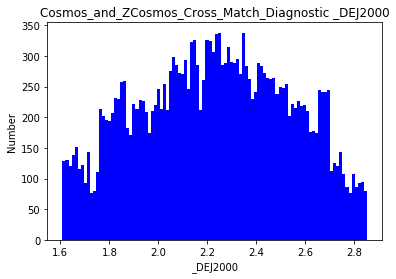

COSMOS


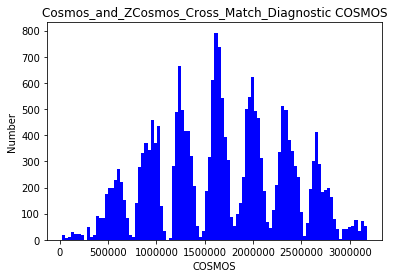

RAJ2000


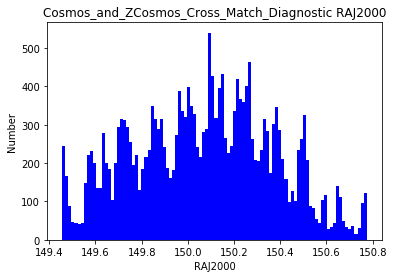

DEJ2000


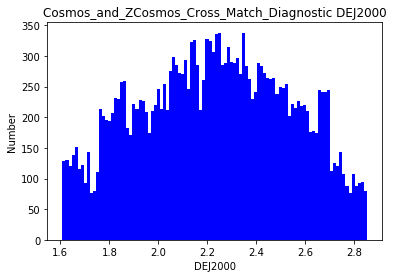

imagA


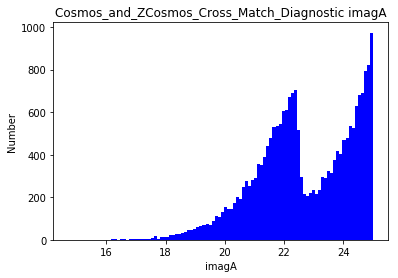

n_imagA


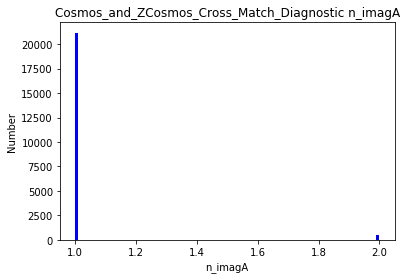

Bmag


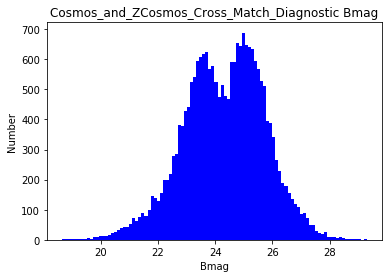

Vmag


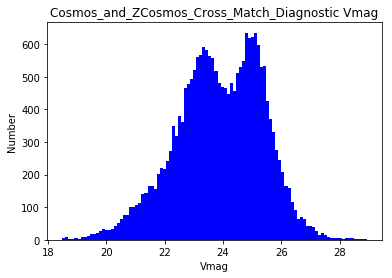

gmag


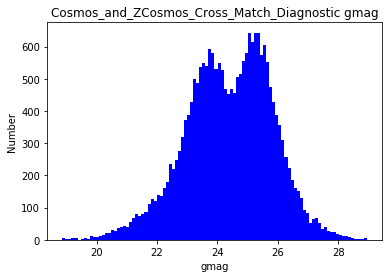

rmag


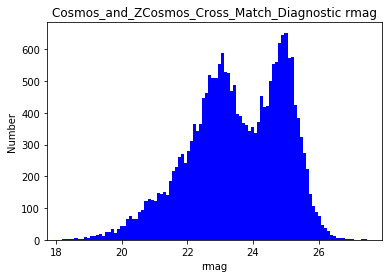

zmag


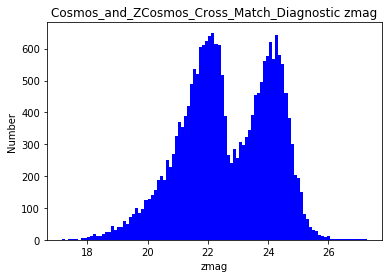

zphot


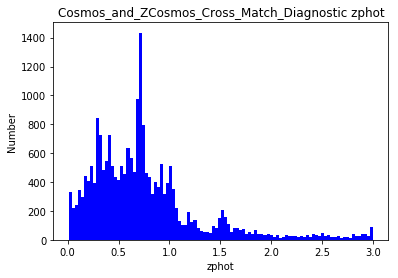

_RAJ2000.1


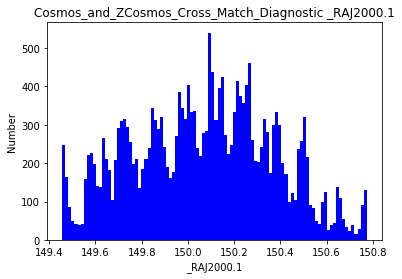

_DEJ2000.1


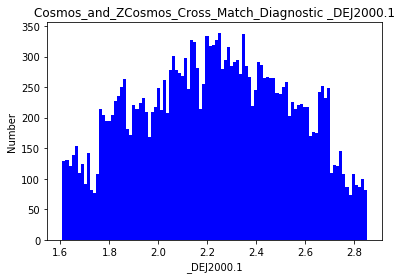

zCOSMOS


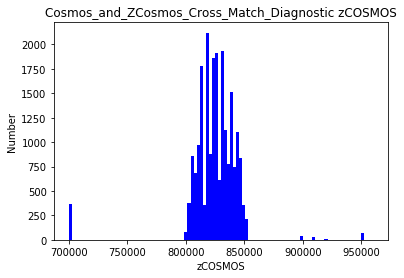

RAJ2000.1


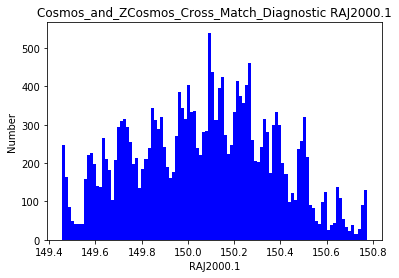

DEJ2000.1


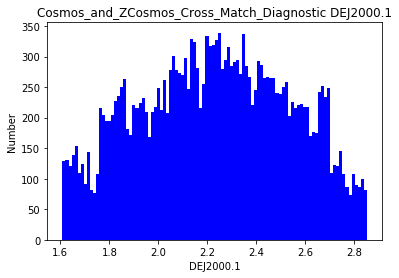

z


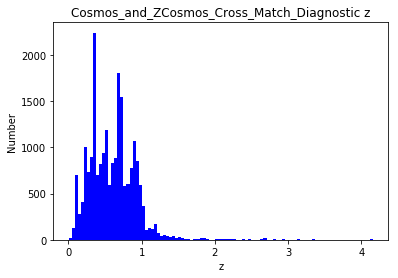

CClass


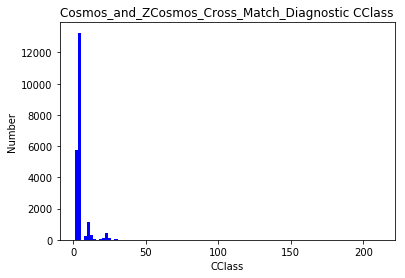

Imag


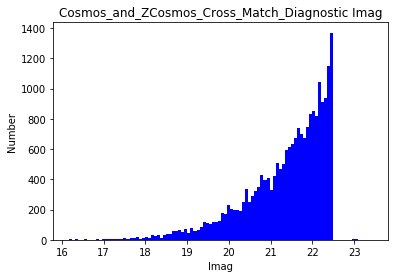

Mask


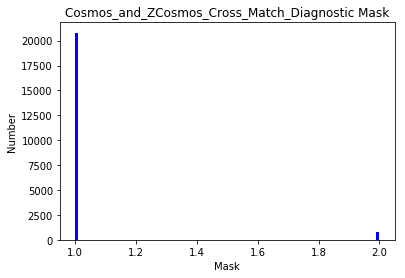

In [27]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_and_zcosmos_cross_match_useful_columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [60]:
##Find duplicates in cosmos_and_zcosmos_cross_match
value_counts_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_zcosmos = value_counts_zcosmos.tolist()
value_counts_cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_cosmos_and_zcosmos_cross_match = value_counts_cosmos_and_zcosmos_cross_match.tolist()
ids_zcosmos = value_counts_zcosmos.keys().tolist()

value_counts_cosmos = cosmos_and_zcosmos_cross_match['COSMOS'].value_counts(sort=False)
counts_cosmos = value_counts_cosmos.tolist()
ids_cosmos = value_counts_cosmos.keys().tolist()

In [134]:
total = 0
# zcosmos_df_part2 = zcosmos_df.query('z<999')
#Keep one with the lowerst angDist

# print(cosmos_and_zcosmos_cross_match)
print(len(cosmos_df))
print(len(zcosmos_df))
print(cosmos_and_zcosmos_cross_match.index.min)
print(len(cosmos_and_zcosmos_cross_match))
match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
match_indices_cosmos = cosmos_and_zcosmos_cross_match['COSMOS']
print(match_indices_zcosmos)
mask_zcosmos = np.zeros_like(match_indices_zcosmos)
for i in match_indices_cosmos:
#     if cosmos_and_zcosmos_cross_match.index[i] > len(cosmos_and_zcosmos_cross_match):
#         print(i)
#         cosmos_and_zcosmos_cross_match.remove(i)
    if counts_cosmos_and_zcosmos_cross_match[i] > 1:
###print(cosmos_and_zcosmos_cross_match['zCOSMOS'].loc[ids_zcosmos[i]])
        ids_cosmos_index = cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match['COSMOS'] == ids_cosmos[i]].index.tolist()
        cosmos_angDist_set = (cosmos_and_zcosmos_cross_match['angDist'][ids_cosmos_index])
        print(cosmos_angDist_set)
        print(ids_cosmos_index)
        print(mask_cosmos.shape)
        mask_cosmos[ids_cosmos_index[np.argmin(np.abs(cosmos_angDist_set))]] = 1
# #     indexes in the cross match are longer than the cross match itself, which makes no sense
# #     print(type(cosmos_and_zcosmos_cross_match['angDist']))#[i]))
    else:
        mask_cosmos[i] = 1
    cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match.query('mask_cosmos>0.1')

# for i in match_indices_zcosmos:
#     print(cosmos_and_zcosmos_cross_match.iloc[i])

438226
10644
<bound method IndexOpsMixin.min of Int64Index([    0,     2,     3,     4,     9,    10,    12,    16,    17,
               18,
            ...
            26050, 26051, 26052, 26053, 26054, 26055, 26056, 26057, 26058,
            26059],
           dtype='int64', length=21623)>
21623
0        824273
2        824368
3        824795
4        824795
9        824672
10       824583
12       824743
16       824882
17       824882
18       825030
19       825030
20       825030
21       824408
22       824759
23       824759
26       824693
27       824240
28       824240
29       825003
30       824240
31       824686
32       824686
33       824686
34       824726
35       824991
36       824991
41       824852
42       824695
43       824866
44       824816
          ...  
26024    700894
26026    841476
26027    841476
26028    841476
26029    838344
26030    847361
26031    840984
26032    823535
26033    838934
26034    838934
26035    838934
26036    847361
26037    847

IndexError: list index out of range

In [88]:
##find cosmos ids of cross match elements with zcosmos id used


match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
for i in zcosmos_unique['counts']:
    
    
    
#     zcosmos_id2 = cosmos_and_zcosmos_cross_match[i][zcosmos_id1]
#     print(zcosmos_unique['zcosmos_ids'])
    #     cosmos_ids = 

if zcosmos_unique['zcosmos_ids'][i] > 1:
        print('YAY')
#         cosmos_ids_set = (cosmos_and_zcosmos_cross_match['COSMOS'][i])
###    ids_cosmos = zcosmos_unique['xmatch_indices'][cosmos_and_zcosmos_cross_match['COSMOS'] == zcosmos_unique['zcosmos_ids'][i]].index.tolist()

IndexError: index 11376 is out of bounds for axis 0 with size 9129

In [100]:
match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
#     print(zcosmos_unique['counts'])

duplicated_indices = zcosmos_unique['xmatch_indices'][zcosmos_unique['counts'] > 1]
for i in duplicated_indices:
    print(i)
    zcosmos_id = (cosmos_and_zcosmos_cross_match['zCOSMOS'][i])
    print(zcosmos_id, np.where(zcosmos_unique['zcosmos_ids'] == zcosmos_id))
#     print(cosmos_and_zcosmos_cross_match[COSMOS'][zcosmos_id])

11376
825491 (array([4738]),)
19713
805305 (array([480]),)
741
824321 (array([4199]),)
7248
844550 (array([8278]),)
15904
831556 (array([5977]),)
3267
837402 (array([7039]),)
17790
816497 (array([2271]),)
12501
841041 (array([7861]),)
18414


KeyError: 18414

In [125]:
cosmos_and_zcosmos_cross_match

,angDist,_RAJ2000,_DEJ2000,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,Bmag,...,zphot,_RAJ2000.1,_DEJ2000.1,zCOSMOS,RAJ2000.1,DEJ2000.1,z,CClass,Imag,Mask
0,0.072302,150.21992,2.27797,1603755,150.21992,2.27797,0.17,21.8588,1,23.2285,...,0.61,150.219940,2.277972,824273,150.219940,2.277972,0.7288,1.1,22.21,1
2,0.113585,150.20375,2.27275,1603935,150.20375,2.27275,0.21,22.1439,1,25.8226,...,0.84,150.203781,2.272744,824368,150.203781,2.272744,0.8795,3.5,22.09,1
3,0.046088,150.11016,2.27258,1603958,150.11016,2.27258,0.59,21.0134,1,23.1575,...,0.46,150.110168,2.272570,824795,150.110168,2.272570,0.4922,3.5,20.95,1
4,3.310317,150.10933,2.27219,1604021,150.10933,2.27219,0.98,24.8869,1,25.9311,...,0.70,150.110168,2.272570,824795,150.110168,2.272570,0.4922,3.5,20.95,1
9,0.083979,150.13958,2.27073,1604303,150.13958,2.27073,0.89,20.4569,1,22.1714,...,0.43,150.139603,2.270726,824672,150.139603,2.270726,0.4410,4.5,20.42,1
10,0.055028,150.15596,2.26988,1604538,150.15596,2.26988,0.22,21.6291,1,22.8113,...,0.19,150.155975,2.269883,824583,150.155975,2.269883,0.2085,4.5,21.70,1
12,0.126364,150.12144,2.26730,1604544,150.12144,2.26730,0.51,21.4270,1,22.5625,...,1.01,150.121475,2.267303,824743,150.121475,2.267303,0.8270,4.5,21.35,1
16,0.093596,150.09232,2.26948,1604701,150.09232,2.26948,0.37,21.7974,1,23.5119,...,0.67,150.092346,2.269481,824882,150.092346,2.269481,0.6857,4.5,21.76,1
17,2.468821,150.09166,2.26946,1604703,150.09166,2.26946,0.98,24.7523,1,25.7680,...,0.52,150.092346,2.269481,824882,150.092346,2.269481,0.6857,4.5,21.76,1
18,4.167810,150.06219,2.26763,1604825,150.06219,2.26763,0.13,23.1826,1,24.9839,...,0.56,150.062149,2.268787,825030,150.062149,2.268787,1.0720,1.5,22.24,1


In [128]:
# zcosmos_unique['xmatch_indices']
# match_indices_zcosmos[zcosmos_unique['xmatch_indices'][2]]
# match_indices_zcosmos
df = cosmos_and_zcosmos_cross_match1
match_indices_zcosmos
for i in zcosmos_unique['xmatch_indices'][zcosmos_unique['counts'] > 1]:
    print(i)
#     df['zCOSMOS'][i]#[cosmos_and_zcosmos_cross_match['zCOSMOS'] == zcosmos_unique['zcosmos_ids'][i]]
#     print(row)

11376
19713
741
7248
15904
3267
17790
12501
18414
19284
14500
229
4227
10811
16733
15795
14892
1910
619
18586
14971
15019
18081
3559
13835
3672
11638
20509
3805
2890
8884
4897
10763
6908
1371
7154
2748
16572
14792
15419
11755
6366
20838
1311
5893
5526
12142
10438
10030
18624
14482
15561
19343
15233
9341
20727
3447
2451
5471
20091
20537
909
17258
7284
18701
4349
7203
1152
18084
4137
13972
3083
1777
20182
3694
17222
11800
264
16899
3109
14143
21180
9794
9589
9863
1667
4165
12762
9671
5875
908
18005
13413
5285
10574
120
7068
21114
4500
10348
8205
20629
18052
13575
2107
10259
7450
15088
14953
15888
18342
16017
16501
18375
16161
2649
8533
4689
16283
16265
18449
16169
15818
16043
18302
18313
12859
13219
12915
2534
12788
13396
12570
12539
15914
15841
19418
19396
796
4279
8421
5008
8776
4602
4294
11378
11385
11315
11617
11665
11533
11289
11535
14282
14161
11498
11493
7017
6981
6878
7190
7092
10588
11657
11226
14179
14180
14993
15075
10824
15163
10819
10770
11732
11437
11898
11920
10582
15473
4

19338
17760
15634
11277
11454
20151
18477
1497
18305
1480
15968
3870
13694
15964
1021
10935
15196
15117
1449
15204
14508
14509
11594
913
3529
20239
17770
13275
7757
20405
3879
19602
15225
16368
13675
18154
15267
16471
16472
3388
11285
14692
19465
15605
15606
11377
16238
11374
14695
16050
16046
3764
17607
15437
16200
16207
1491
4179
13805
14522
19195
15663
4051
3501
4050
15665
13297
1193
14157
1186
18566
18251
19095
20357
18563
15439
19127
15996
11328
14417
13841
15028
17554
18282
15039
14784
15042
1307
17789
11373
17736
7743
19761
10901
20574
11572
14882
15275
13491
18011
14296
14639
20709
11252
10971
19377
15722
14025
1354
3577
13592
15297
14306
15446
20553
17682
13108
12650
20201
7409
11949
13483
4516
4524
3418
12969
16913
1027
6831
1377
927
8446
171
20205
4233
1370
4433
2427
216
20023
12185
2100
55
18152
7005
2726
2729
4967
1809
904
17122
4354
8637
12366
979
11961
2562
3290
11749
7457
17609
18914
1834
3031
17282
7384
6872
18908
3120
6869
2111
8889
8888
11928
13159
951
18957
11859
39

6916
969
7027
17910
3491
5090
3929
14097
612
16074
20279
306
305
7583
1692
1551
20006
16439
7115
7090
10806
20226
20684
10421
20345
7727
7688
8141
20611
13730
13729
4215
1589
7678
10067
7852
1176
2893
2892
1932
4225
949
2082
4730
13634
8093
13994
12699
17935
1786
8882
2776
2775
3594
8892
20189
12813
1273
20131
1473
3539
898
19679
17978
714
19428
19420
13370
4766
13314
3449
4726
19852
1978
3997
3230
1452
2849
2827
13669
10130
4029
4513
20523
1610
10651
7911
4105
18159
7600
8418
18091
1774
4960
3641
10241
20096
953
4534
12080
2720
2210
1432
4704
12522
19328
17846
20594
13942
2017
9321
4973
9309
13704
3193
9778
8995
8163
4692
9289
13663
4971
13360
2712
5702
17562
12173
9282
4301
6840
18002
9472
4000
9486
4258
12525
13924
20314
3588
11798
2272
20452
12944
2256
4114
11826
7125
4053
12769
8564
7057
8563
7056
1719
9161
1787
2358
8745
9570
2606
9035
7992
5435
1764
3634
2247
2232
9548
3253
7062
13131
5595
5082
8730
17737
5127
5357
7754
13614
1532
19944
18736
5036
20197
4447
1247
8228
5503
4784


In [ ]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match_useful_columns]

In [140]:
### YAY, looks like this might work!!!!!!

for i in zcosmos_unique['xmatch_indices'][zcosmos_unique['counts'] > 1]:
    df['angDist'][df['zCOSMOS'] == df['zCOSMOS'][i]]
    zcosmos_angDist_set = (df['angDist'][df['zCOSMOS'] == df['zCOSMOS'][i]])
    np.argmin(np.abs(zcosmos_angDist_set))
    except ValueError:
        print(i)
#         mask_zcosmos[ids_zcosmos_index[np.argmin(np.abs(zcosmos_angDist_set))]] = 1

In [ ]:
##Get only the points in cosmos that arent also in zcosmos.
cosmos_only = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
print(len(cosmos_only))

In [ ]:
##Get only the points in zcosmos that arent also in cosmos.
zcosmos_only = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]
print(len(zcosmos_only))

In [ ]:
##Comparing the magnitudes/redshifts of galaxies in both cosmos and zcosmos and galaxies just in cosmos
for i in cosmos_only.columns:
    if i in cosmos_and_zcosmos_cross_match.columns:
        print(i)
        plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, alpha=.2, normed = True)
        plt.hist(cosmos_only[i], color='green', linewidth=5, alpha=.2, normed = True)
        plt.xlabel(i)
        plt.ylabel("Number")
        plt.title("Galaxies In Comos Only" + " " + "Versus" + " " + "Galaxies In Cosmos AND Zcosmos" + " " + i)
        ##plt.savefig("Galaxies In Comos Only" + " " + "Versus" + "Galaxies In Cosmos AND Zcosmos" + " " + i + " " + "Plot.png")
        plt.show()

For imagA: 
- roughly equal percentage of galaxies iwth imag 15-18
- 